In [29]:
include(joinpath("..","src","setup.jl"))
paramfile = joinpath("..","data","count_lengths","run_2018-11-26","params.jld2")

"../data/count_lengths/run_2018-11-26/params.jld2"

In [23]:
settings = TOML.parsefile("../src/settings.toml")

Dict{AbstractString,Any} with 9 entries:
  "percept_lengths" => Dict{AbstractString,Any}("threshold"=>0.2,"min_length_ms…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "mask"            => Dict{AbstractString,Any}("window_ms"=>500,"delta_ms"=>25…
  "rates"           => Dict{AbstractString,Any}("rates_Hz"=>[2, 4, 8, 16, 32],"…
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "stimulus"        => Dict{AbstractString,Any}("repeats"=>100,"ramp_len_ms"=>1…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"w…
  "bandwidth_ratio" => Dict{AbstractString,Any}("window_ms"=>800,"full_band_rat…

# Object-level

In [11]:
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 5) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 6
end;

In [24]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(params,settings,intermediate_results=true))
end

d = 3


┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/stim.jl:43


d = 6


┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/stim.jl:43


d = 12


┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/stim.jl:43


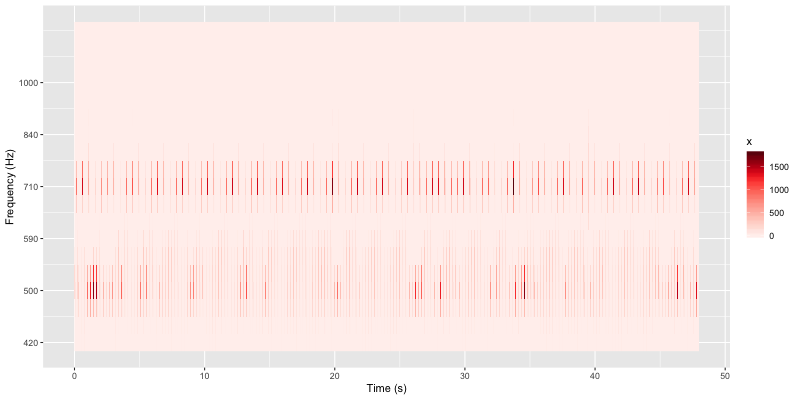

RObject{VecSxp}


In [25]:
rplot(result[2].primary_source)

In [26]:
result[2].percepts

(ratio = [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], sband = [6, 6, 6, 6, 6, 6, 6, 6, 6, 6  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6], tband = [6.0, 0.0, 6.0, 0.0, 0.0, 6.0, 6.0, 6.0, 6.0, 6.0  …  6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0], counts = ([3.6, 1.2, 1.8, 1.6, 1.7, 2.6, 2.2, 4.5, 1.1, 4.7  …  0.9, 2.3, 1.6, 0.8, 0.8, 1.1, 4.2, 1.4, 0.3, 1.7], Bool[false, true, false, true, false, true, false, true, false, true  …  true, false, true, false, true, false, true, false, true, false]))

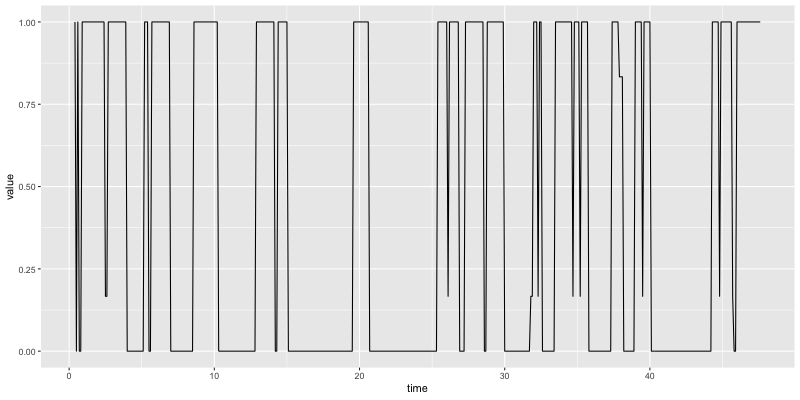

RObject{VecSxp}


In [27]:
rplot(result[2].percepts.ratio)

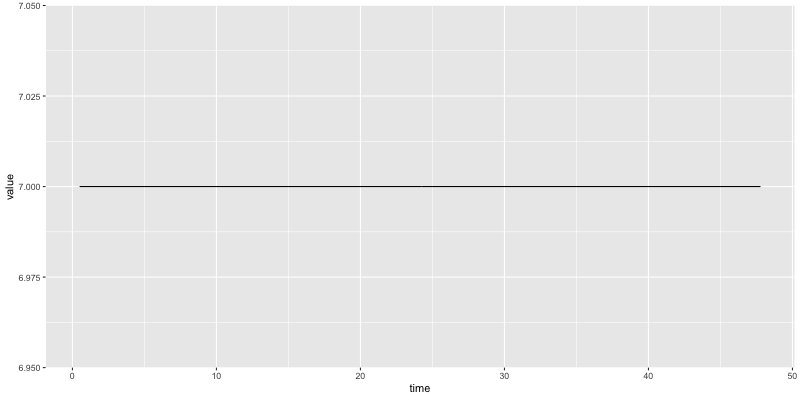

RObject{VecSxp}


In [7]:
rplot(result[2].percepts.tband)

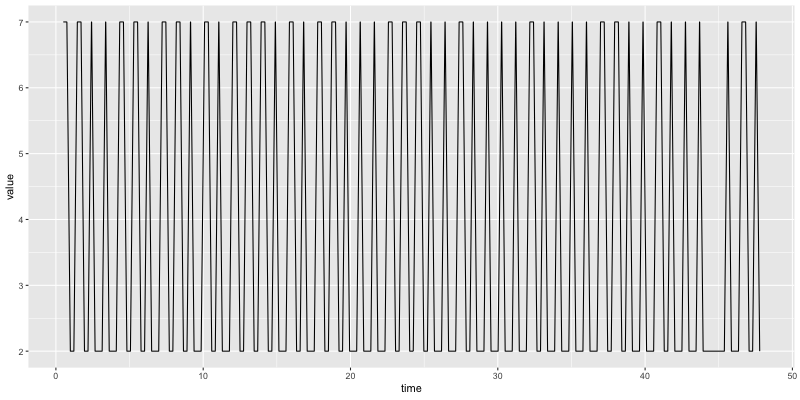

RObject{VecSxp}


In [8]:
rplot(result[2].percepts.sband)

**NEXT STEP**: check on the reuslts for the other two types of model

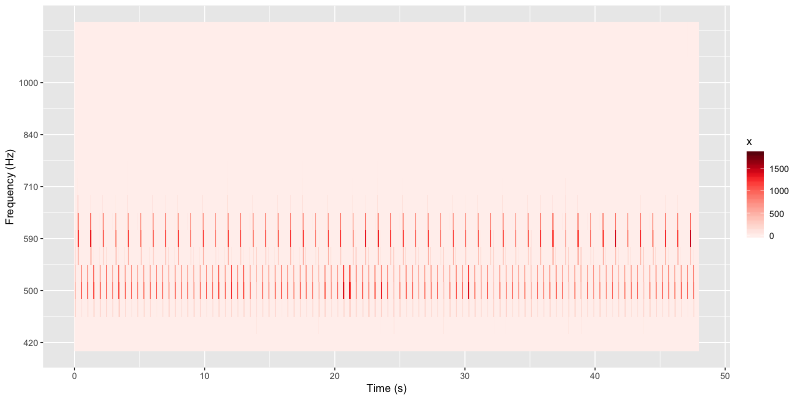

RObject{VecSxp}


In [9]:
rplot(result[1].primary_source)

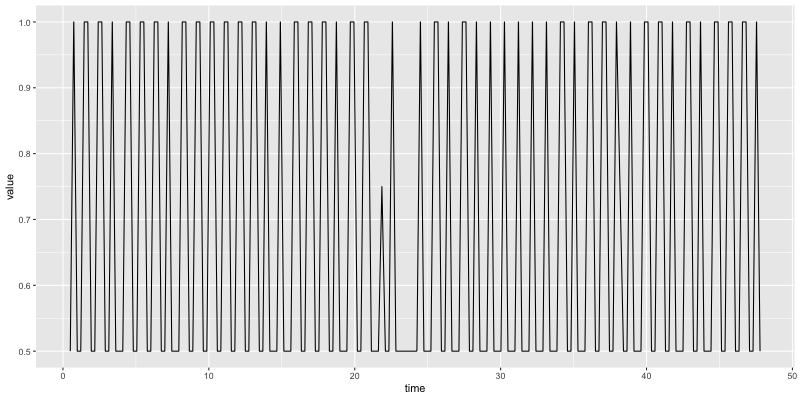

RObject{VecSxp}


In [10]:
rplot(result[1].percepts.ratio)

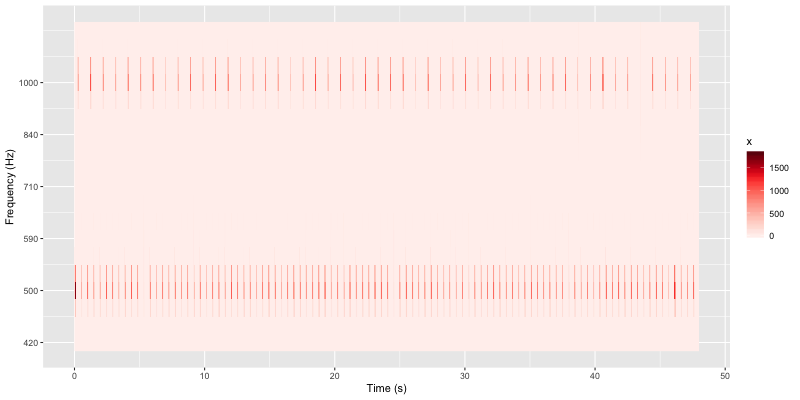

RObject{VecSxp}


In [11]:
rplot(result[3].primary_source)

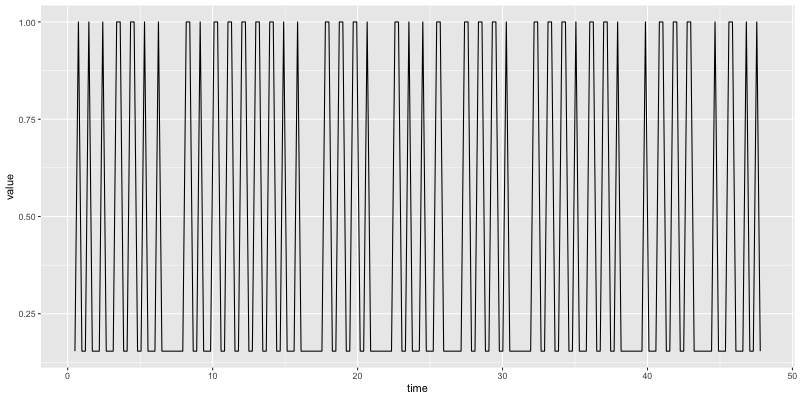

RObject{VecSxp}


In [12]:
p = rplot(result[3].percepts.ratio)

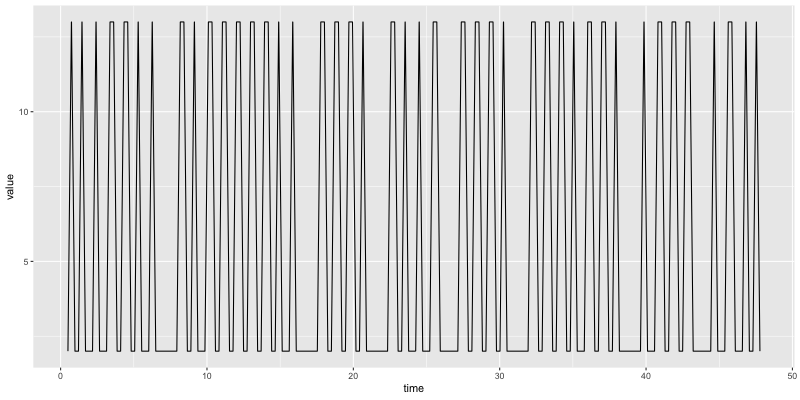

RObject{VecSxp}


In [13]:
rplot(result[3].percepts.sband)

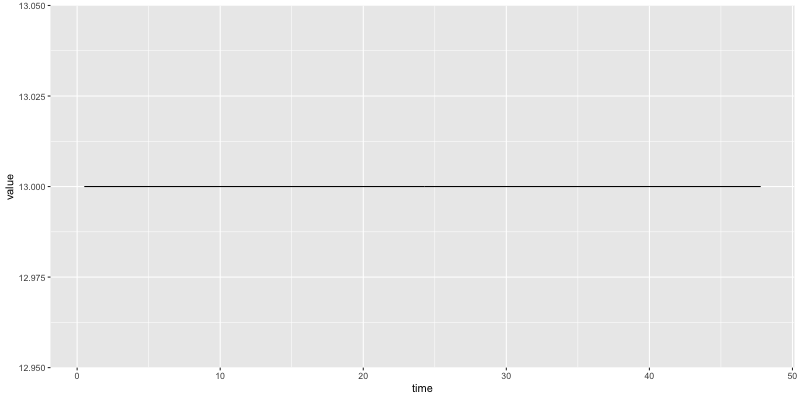

RObject{VecSxp}


In [14]:
rplot(result[3].percepts.tband)

This looks pretty promising! Let's make sure it works with the other three levels

# Cortical-level

In [30]:
params = getparams(paramfile) do i,row
  abs(row[:s_c_m] - 5) < 1 &&
  abs(row[:s_c_a] - 44) < 1 &&
  row[:Δf] == 6
end

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500 ms
  :f_τ_m     => 350 ms
  :t_W_m_σ_N => 3.0
  :f_τ_x     => 500 ms
  :t_τ_σ     => 500 ms
  :f_τ_σ     => 500 ms
  :Δf        => 6
  :s_τ_a     => 3 s
  :t_τ_x     => 500 ms
  :s_W_m_c   => 6.0
  :f_W_m_c   => 6.0
  :t_W_m_σ_ϕ => 7.0
  :t_τ_m     => 350 ms
  :t_τ_a     => 3 s
  :s_c_a     => 44.0
  :t_c_σ     => 0.0
  :s_c_x     => 3.0
  :s_τ_m     => 350 ms
  :Δt        => 120 ms
  :s_c_σ     => 0.2
  :f_τ_a     => 3 s
  :s_c_m     => 5.0
  :f_c_a     => 0.0
  :t_W_m_c   => 6.0
  ⋮          => ⋮

In [32]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(params,settings,intermediate_results=true))
end

d = 3
d = 6
d = 12


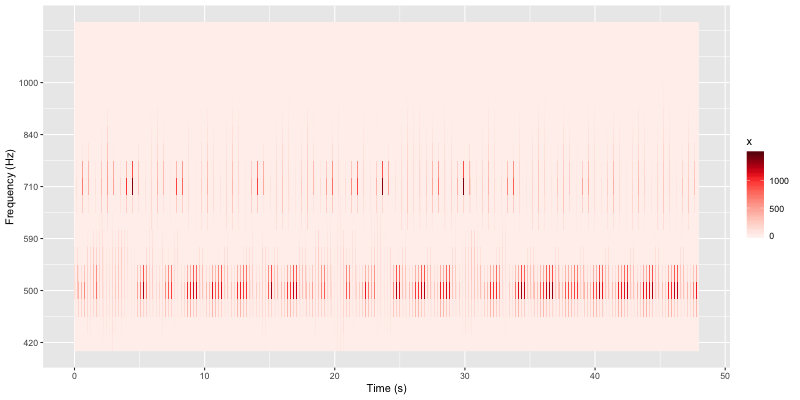

RObject{VecSxp}


In [33]:
rplot(result[2].primary_source)

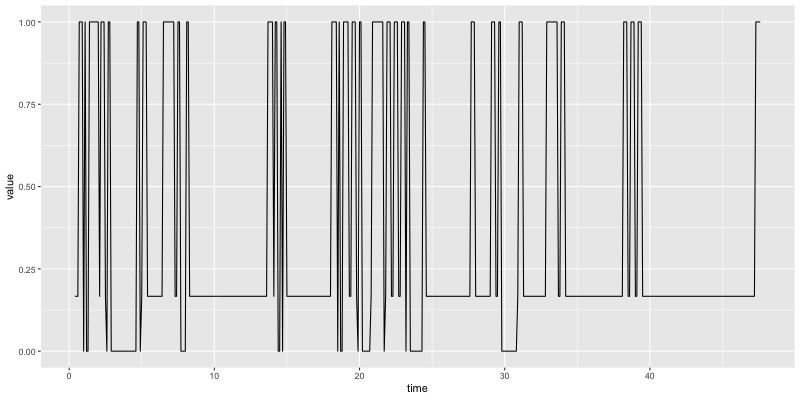

RObject{VecSxp}


In [34]:
rplot(result[2].percepts.ratio)

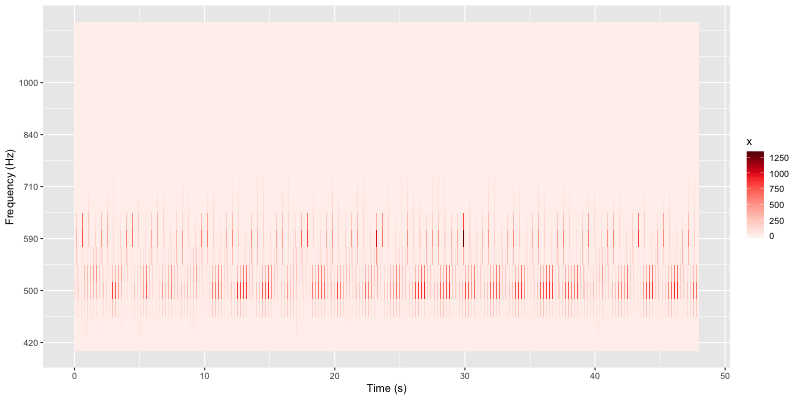

RObject{VecSxp}


In [35]:
rplot(result[1].primary_source)

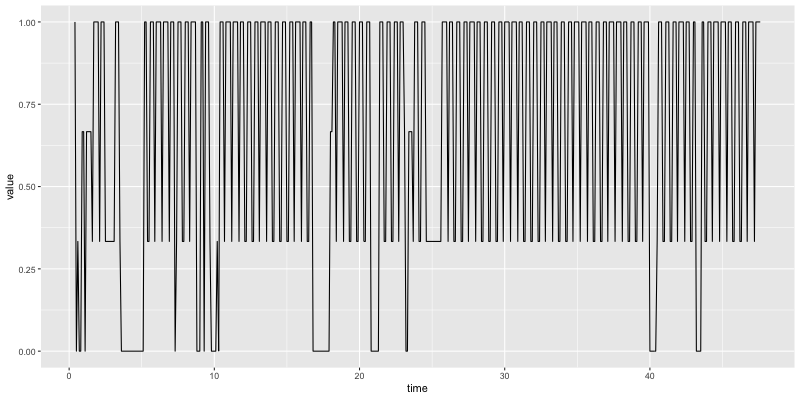

RObject{VecSxp}


In [36]:
rplot(result[1].percepts.ratio)

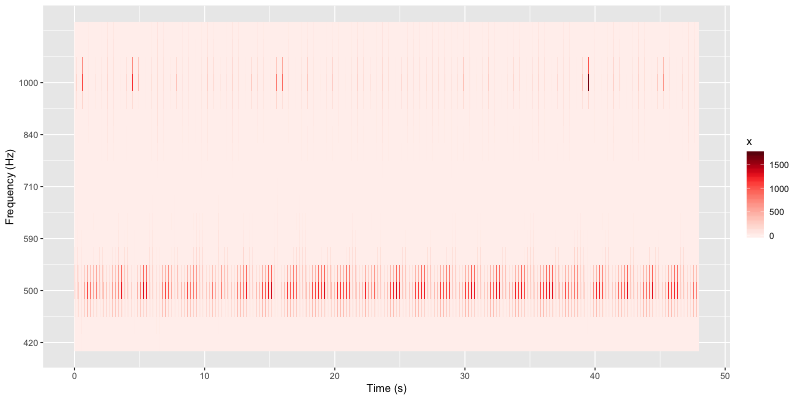

RObject{VecSxp}


In [37]:
rplot(result[3].primary_source)

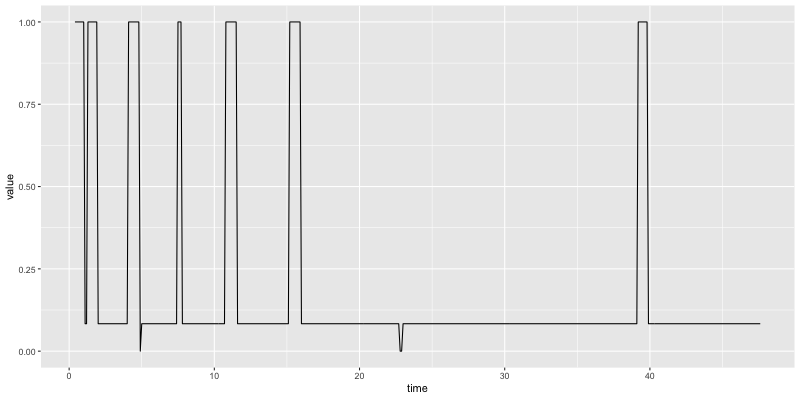

RObject{VecSxp}


In [38]:
rplot(result[3].percepts.ratio)

# Peripheral-level

In [39]:
params = getparams(paramfile) do i,row
  abs(row[:f_c_m] - 130) < 1 &&
  abs(row[:f_c_a] - 15) < 1 &&
  row[:Δf] == 6
end

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500 ms
  :f_τ_m     => 350 ms
  :t_W_m_σ_N => 3.0
  :f_τ_x     => 500 ms
  :t_τ_σ     => 500 ms
  :f_τ_σ     => 500 ms
  :Δf        => 6
  :s_τ_a     => 3 s
  :t_τ_x     => 500 ms
  :s_W_m_c   => 6.0
  :f_W_m_c   => 6.0
  :t_W_m_σ_ϕ => 7.0
  :t_τ_m     => 350 ms
  :t_τ_a     => 3 s
  :s_c_a     => 0.0
  :t_c_σ     => 0.0
  :s_c_x     => 3.0
  :s_τ_m     => 350 ms
  :Δt        => 120 ms
  :s_c_σ     => 0.0
  :f_τ_a     => 3 s
  :s_c_m     => 0.0
  :f_c_a     => 15.0
  :t_W_m_c   => 6.0
  ⋮          => ⋮

In [41]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(params,settings,intermediate_results=true))
end

d = 3
d = 6
d = 12


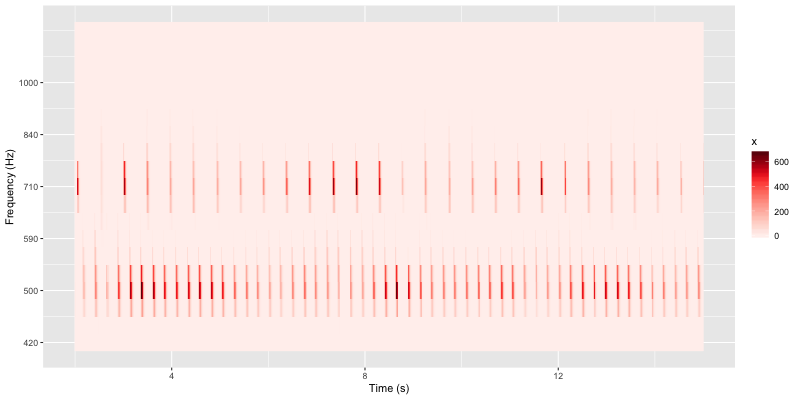

RObject{VecSxp}


In [42]:
rplot(result[2].primary_source[2s .. 15s])

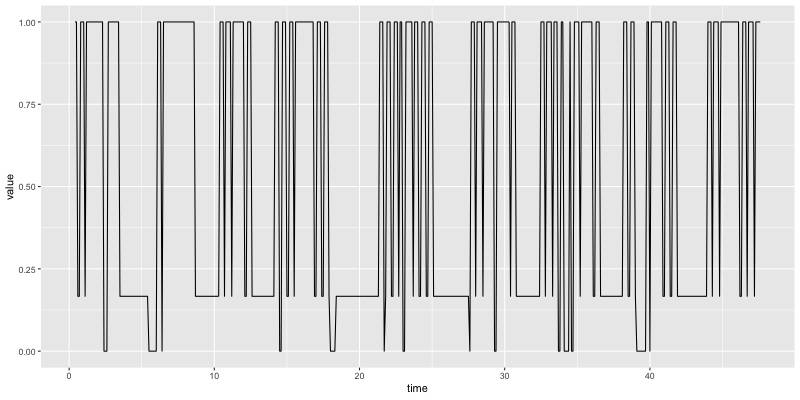

RObject{VecSxp}


In [43]:
rplot(result[2].percepts.ratio)

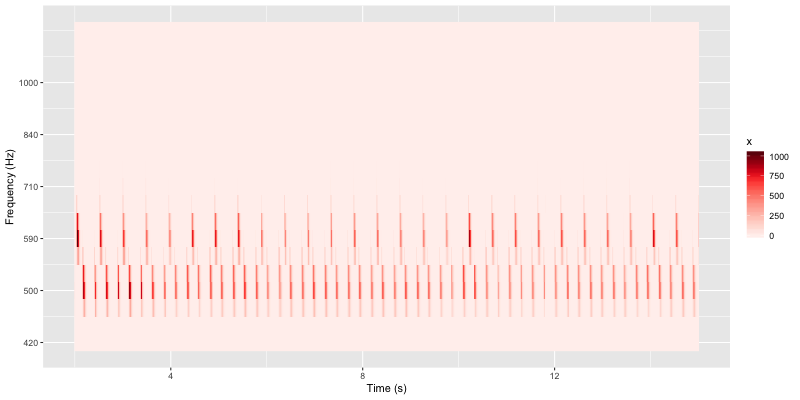

RObject{VecSxp}


In [44]:
rplot(result[1].primary_source[2s .. 15s])

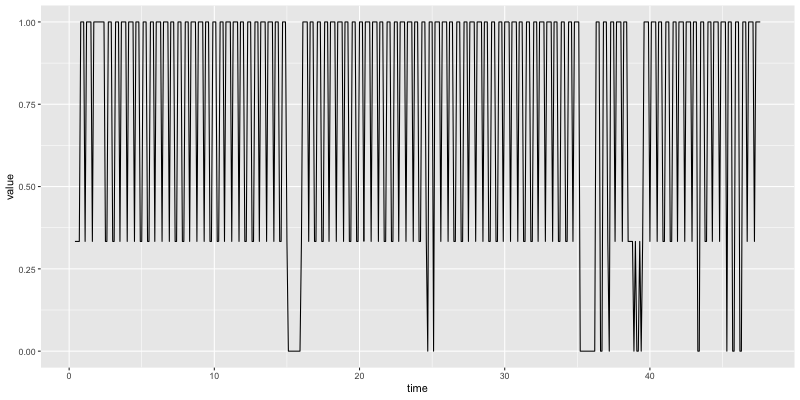

RObject{VecSxp}


In [45]:
rplot(result[1].percepts.ratio)

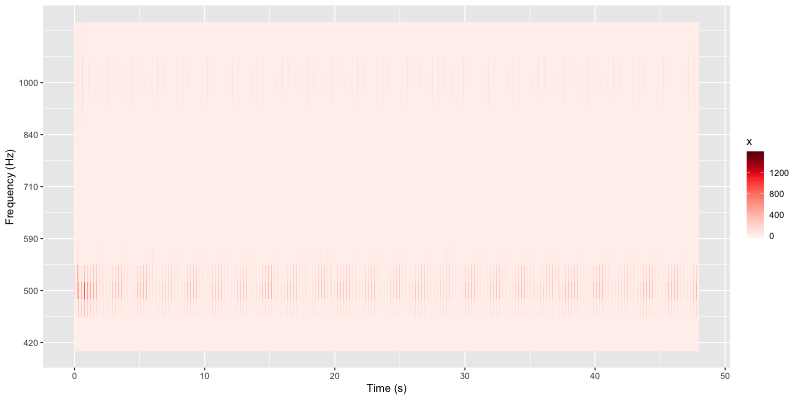

RObject{VecSxp}


In [46]:
rplot(result[3].primary_source)

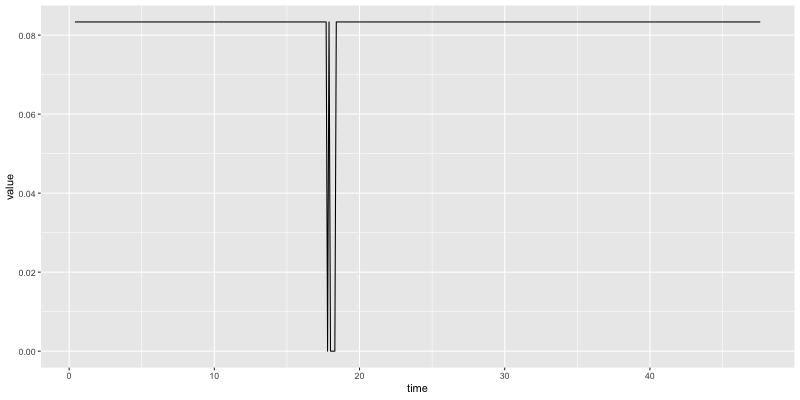

RObject{VecSxp}


In [47]:
rplot(result[3].percepts.ratio)